In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
from google.colab import files
files.upload()

Saving heart_disease_dataset .csv to heart_disease_dataset .csv


{'heart_disease_dataset .csv': b'Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease\r\n75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1\r\n48,Male,204,165,62,Current,None,5,No,No,No,9,70,Yes,Typical Angina,0\r\n53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1\r\n69,Female,192,90,72,Current,None,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0\r\n62,Female,172,163,93,Never,None,6,No,Yes,No,2,183,Yes,Asymptomatic,0\r\n77,Male,309,110,73,Never,None,0,No,Yes,Yes,4,122,Yes,Asymptomatic,1\r\n64,Female,211,105,86,Former,Heavy,8,Yes,Yes,Yes,2,120,No,Typical Angina,1\r\n60,Female,208,148,83,Never,Moderate,4,No,Yes,Yes,2,113,Yes,Asymptomatic,1\r\n37,Female,317,137,66,Current,Heavy,3,No,Yes,Yes,5,114,No,Non-anginal Pain,0\r\n63,Male,204,141,68,Former,Heavy,8,No,Yes,No,3,107,No,Asymptomatic,1\r\n67,Female,282,108,

In [ ]:
data = pd.read_csv('heart_disease_dataset .csv')
data

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Female,269,111,86,Never,Heavy,5,No,Yes,Yes,10,120,No,Non-anginal Pain,1
996,78,Female,334,145,76,Never,NaN,6,No,No,No,10,196,Yes,Typical Angina,1
997,79,Male,151,179,81,Never,Moderate,4,Yes,No,Yes,8,189,Yes,Asymptomatic,0
998,60,Female,326,151,68,Former,NaN,8,Yes,Yes,No,5,174,Yes,Atypical Angina,1


In [ ]:
data.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [ ]:
data.tail()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
995,56,Female,269,111,86,Never,Heavy,5,No,Yes,Yes,10,120,No,Non-anginal Pain,1
996,78,Female,334,145,76,Never,NaN,6,No,No,No,10,196,Yes,Typical Angina,1
997,79,Male,151,179,81,Never,Moderate,4,Yes,No,Yes,8,189,Yes,Asymptomatic,0
998,60,Female,326,151,68,Former,NaN,8,Yes,Yes,No,5,174,Yes,Atypical Angina,1
999,53,Male,226,116,82,Current,NaN,6,No,No,Yes,5,161,Yes,Asymptomatic,1


In [ ]:
data.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Smoking,0
Alcohol Intake,340
Exercise Hours,0
Family History,0
Diabetes,0


In [ ]:
data.dropna

<bound method DataFrame.dropna of      Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0     75  Female          228             119          66  Current   
1     48    Male          204             165          62  Current   
2     53    Male          234              91          67    Never   
3     69  Female          192              90          72  Current   
4     62  Female          172             163          93    Never   
..   ...     ...          ...             ...         ...      ...   
995   56  Female          269             111          86    Never   
996   78  Female          334             145          76    Never   
997   79    Male          151             179          81    Never   
998   60  Female          326             151          68   Former   
999   53    Male          226             116          82  Current   

    Alcohol Intake  Exercise Hours Family History Diabetes Obesity  \
0            Heavy               1             No       No     Yes   
1              NaN               5             No       No      No   
2            Heavy               3            Yes       No     Yes   
3              NaN               4             No      Yes      No   
4              NaN               6             No      Yes      No   
..             ...             ...            ...      ...     ...   
995          Heavy               5             No      Yes     Yes   
996            NaN               6             No       No      No   
997       Moderate               4            Yes       No     Yes   
998            NaN               8            Yes      Yes      No   
999            NaN               6             No       No     Yes   

     Stress Level  Blood Sugar Exercise Induced Angina   Chest Pain Type  \
0               8          119                     Yes   Atypical Angina   
1               9           70                     Yes    Typical Angina   
2               5          196                     Yes   Atypical Angina   
3               7          107                     Yes  Non-anginal Pain   
4               2          183                     Yes      Asymptomatic   
..            ...          ...                     ...               ...   
995            10          120                      No  Non-anginal Pain   
996            10          196                     Yes    Typical Angina   
997             8          189                     Yes      Asymptomatic   
998             5          174                     Yes   Atypical Angina   
999             5          161                     Yes      Asymptomatic   

     Heart Disease  
0                1  
1                0  
2                1  
3                0  
4                0  
..             ...  
995              1  
996              1  
997              0  
998              1  
999              1  

[1000 rows x 16 columns]>

In [ ]:
data.shape

(1000, 16)

**Visualization**

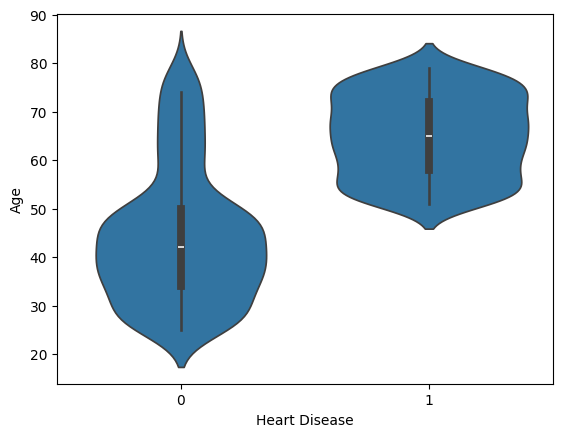

In [ ]:
# Heart Disease with Age
plt.xlabel('Heart Disease')
plt.ylabel('Age')
sns.violinplot(x='Heart Disease', y='Age', data=data)
plt.show()

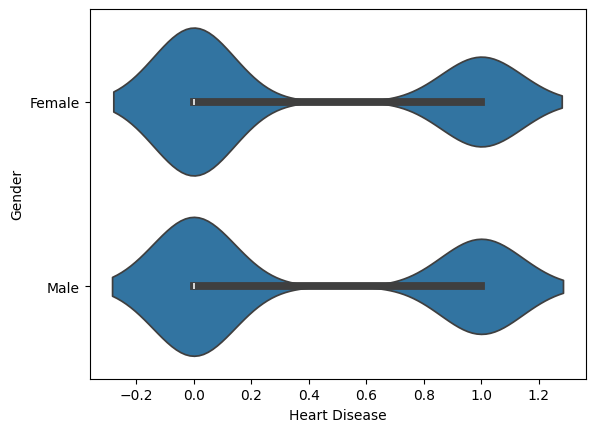

In [ ]:
# Heart Disease with Gender
plt.xlabel('Heart Disease')
plt.ylabel('Gender')
sns.violinplot(x='Heart Disease', y='Gender', data=data)
plt.show()

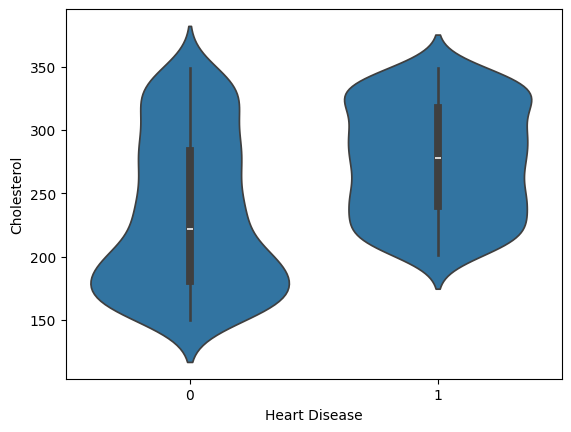

In [ ]:
# Heart Disease with Cholesterol
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
sns.violinplot(x='Heart Disease', y='Cholesterol', data=data)
plt.show()

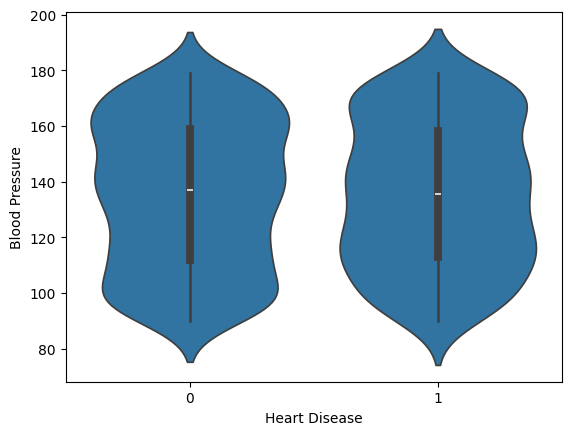

In [ ]:
# Heart Disease with Blood Pressure
plt.xlabel('Heart Disease')
plt.ylabel('Blood Pressure')
sns.violinplot(x='Heart Disease', y='Blood Pressure', data=data)
plt.show()

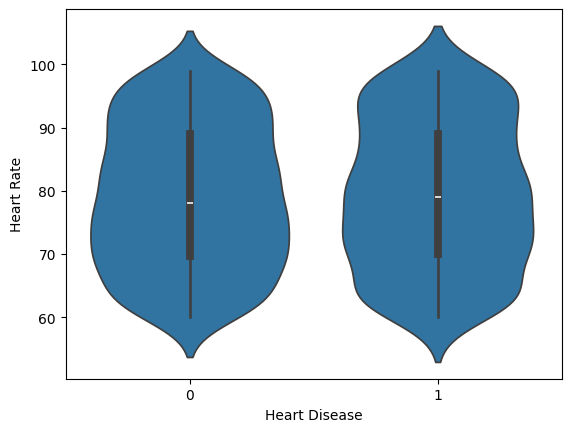

In [ ]:
# Heart Disease with Heart Rate
plt.xlabel('Heart Disease')
plt.ylabel('Heart Rate')
sns.violinplot(x='Heart Disease', y='Heart Rate', data=data)
plt.show()

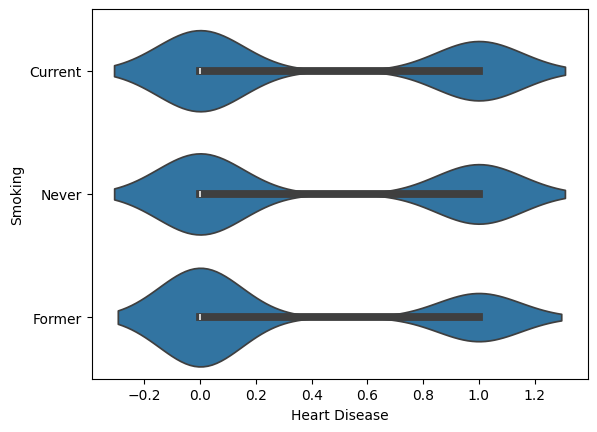

In [ ]:
# Heart Disease with Smoking
plt.xlabel('Heart Disease')
plt.ylabel('Smoking')
sns.violinplot(x='Heart Disease', y='Smoking', data=data)
plt.show()

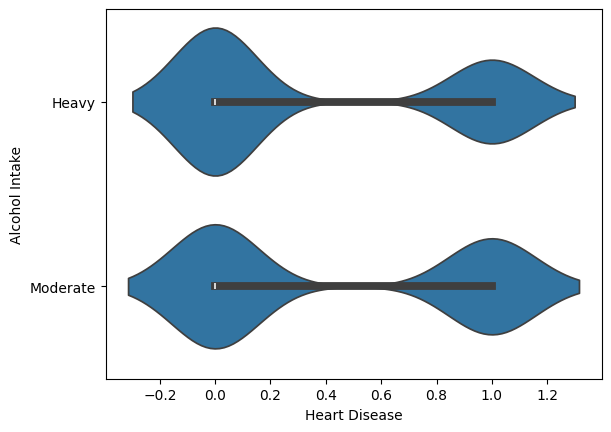

In [ ]:
# Heart Disease with Alcohol Intake
plt.xlabel('Heart Disease')
plt.ylabel('Alcohol Intake')
sns.violinplot(x='Heart Disease', y='Alcohol Intake', data=data)
plt.show()

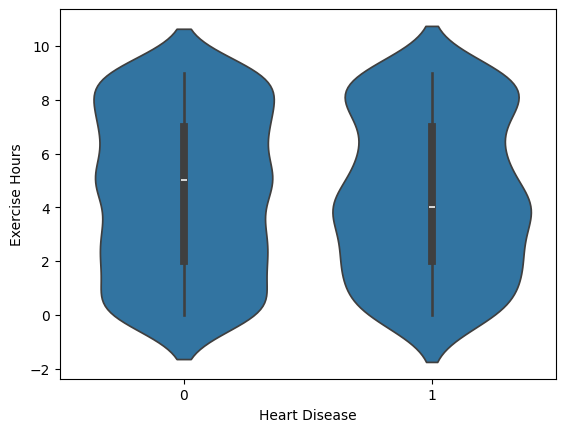

In [ ]:
# Heart Disease with Exercise Hours
plt.xlabel('Heart Disease')
plt.ylabel('Exercise Hours')
sns.violinplot(x='Heart Disease', y='Exercise Hours', data=data)
plt.show()

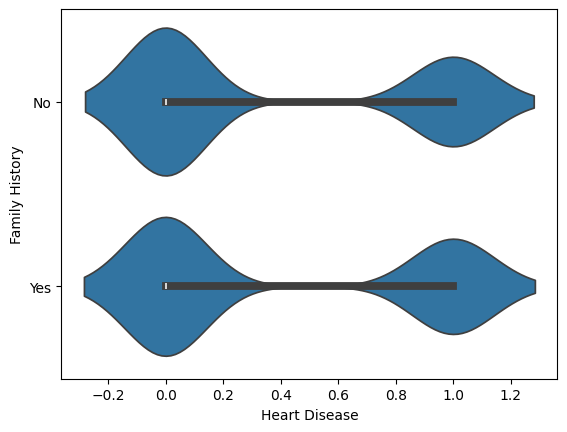

In [ ]:
# Heart Disease with Family History
plt.xlabel('Heart Disease')
plt.ylabel('Family History')
sns.violinplot(x='Heart Disease', y='Family History', data=data)
plt.show()

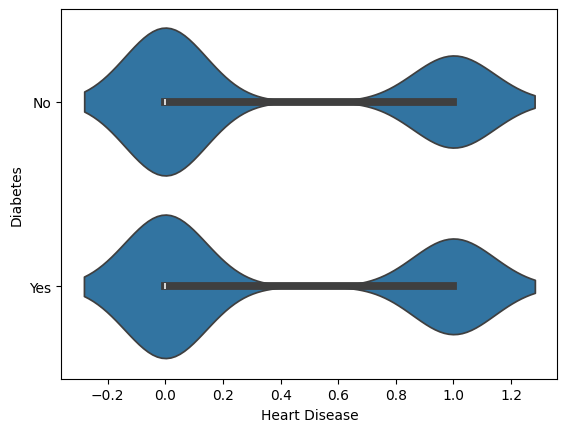

In [ ]:
# Heart Disease with Diabetes
plt.xlabel('Heart Disease')
plt.ylabel('Diabetes')
sns.violinplot(x='Heart Disease', y='Diabetes', data=data)
plt.show()

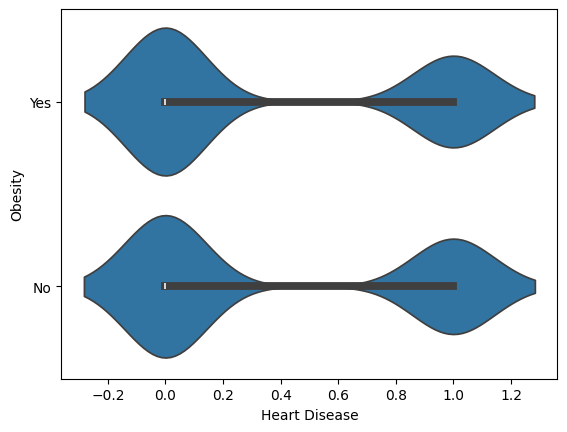

In [ ]:
# Heart Disease with Obesity
plt.xlabel('Heart Disease')
plt.ylabel('Obesity')
sns.violinplot(x='Heart Disease', y='Obesity', data=data)
plt.show()

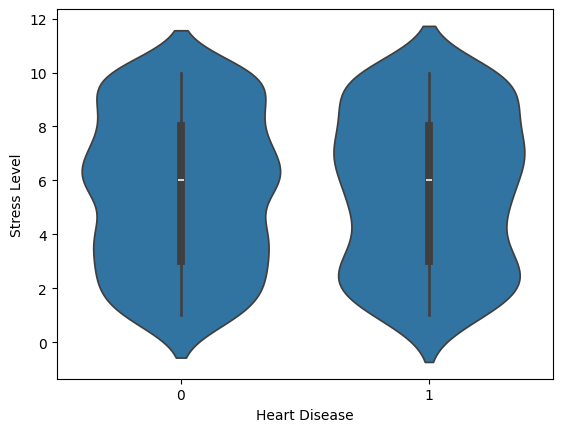

In [ ]:
# Heart Disease with Stress Level
plt.xlabel('Heart Disease')
plt.ylabel('Stress Level')
sns.violinplot(x='Heart Disease', y='Stress Level', data=data)
plt.show()

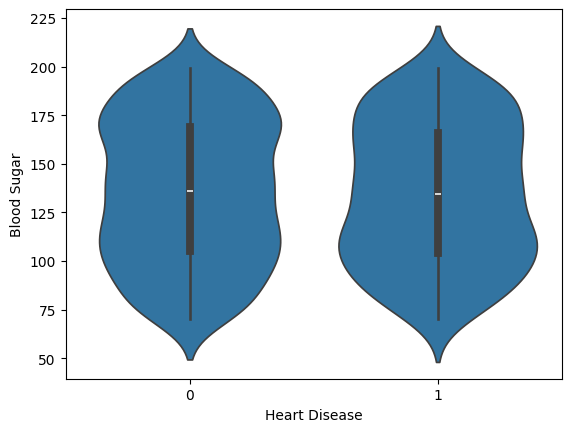

In [ ]:
# Heart Disease with Blood Sugar
plt.xlabel('Heart Disease')
plt.ylabel('Blood Sugar')
sns.violinplot(x='Heart Disease', y='Blood Sugar', data=data)
plt.show()

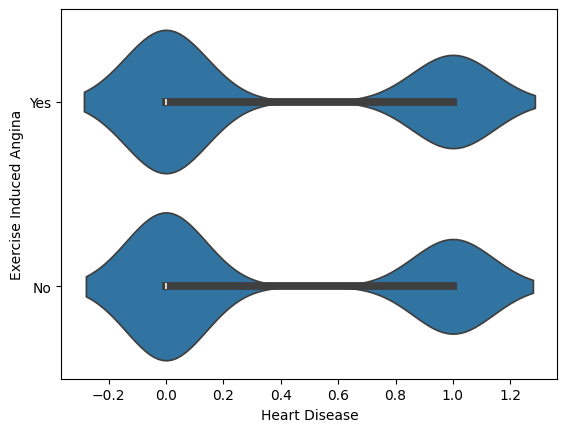

In [ ]:
# Heart Disease with Exercise Indueced Angina
plt.xlabel('Heart Disease')
plt.ylabel('Exercise Induced Angina')
sns.violinplot(x='Heart Disease', y='Exercise Induced Angina', data=data)
plt.show()

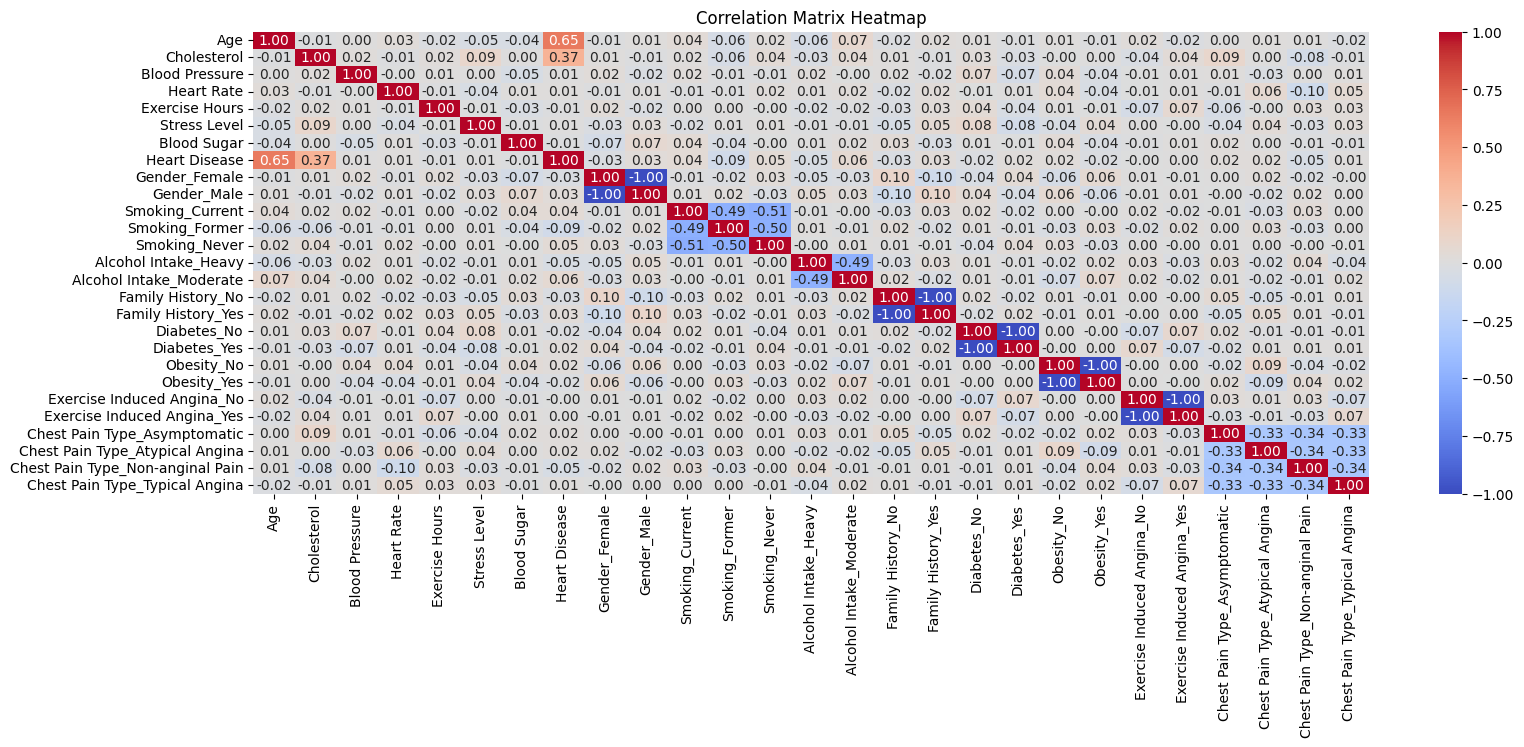

In [ ]:
data = pd.get_dummies(data)
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


From this visualisation we understand that 'Age 'and "Cholesterol Level" can affect on 'Heart Disease'.

**Linear Regression**

In [ ]:
data = pd.get_dummies(data)
X = data.drop('Heart Disease',axis=1)
y = data['Heart Disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.10428786916975569


In [ ]:
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.86
Precision: 0.8292682926829268
Recall: 0.8292682926829268
F1 Score: 0.8292682926829268
Confusion Matrix:
 [[104  14]
 [ 14  68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       118
           1       0.83      0.83      0.83        82

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



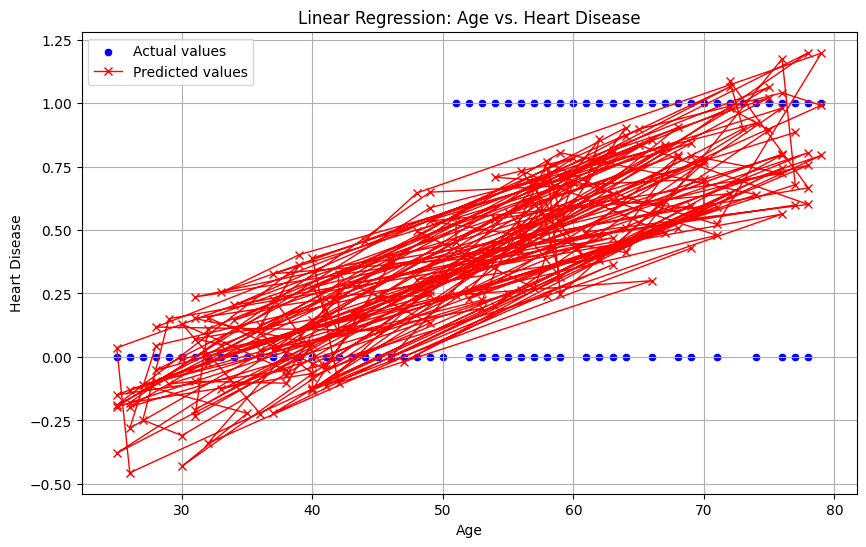

In [ ]:
# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Age'], y=y_test, color='blue', label='Actual values')
plt.plot(X_test['Age'], y_pred, color='red', linewidth=1,marker='x', label='Predicted values')

plt.title('Linear Regression: Age vs. Heart Disease')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.legend()
plt.grid(True)
plt.show()


**Logistic Regression**

In [ ]:
X = data.drop('Heart Disease',axis=1)
y = data['Heart Disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.86
Precision: 0.8292682926829268
Recall: 0.8292682926829268
F1 Score: 0.8292682926829268
Confusion Matrix:
 [[104  14]
 [ 14  68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       118
           1       0.83      0.83      0.83        82

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



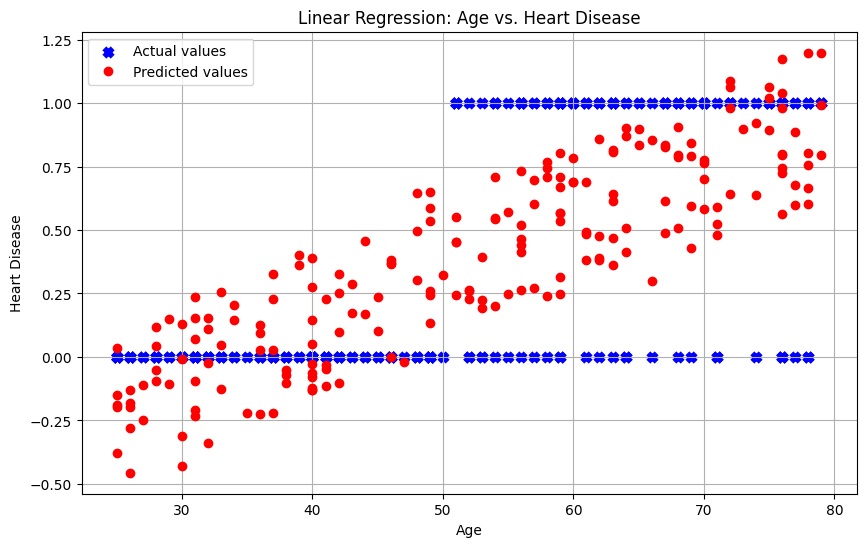

In [ ]:
# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Age'], y=y_test,marker='x', color='blue', label='Actual values',linewidth=4)
plt.plot(X_test['Age'], y_pred, color='red', marker='o', linewidth=0, label='Predicted values')

plt.title('Linear Regression: Age vs. Heart Disease')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.legend()
plt.grid(True)
plt.show()


**Polynomial Regression**

In [ ]:
X = data.drop('Heart Disease',axis=1)
y = data['Heart Disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
degree=2
# The pipeline ensures that the polynomial transformation and regression model are applied sequentially
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X, y)

# Generate predictions
y_pred = poly_model.predict(X_test)

threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.99
Precision: 0.9878048780487805
Recall: 0.9878048780487805
F1 Score: 0.9878048780487805
Confusion Matrix:
 [[117   1]
 [  1  81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       118
           1       0.99      0.99      0.99        82

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



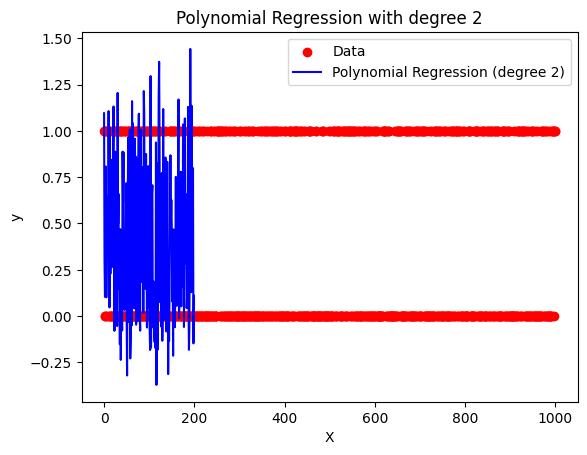

In [ ]:
# Plot the data
plt.scatter(range(len(y)), y, color='red', label='Data')

# Plot the model's predictions
# This assumes `X_test` is defined and corresponds to the range of `y_pred`
plt.plot(range(len(y_pred)), y_pred, color='blue', label=f'Polynomial Regression (degree {degree})')

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Polynomial Regression with degree {degree}')
plt.legend()

# Show the plot
plt.show()

**Multiclass classification**

**OVR**

In [ ]:
X = data.drop('Heart Disease',axis=1)
y = data['Heart Disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Logistic Regression Model using OvR approach
# solver: This parameter specifies the algorithm used to optimize the model during training
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=2000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"OvR Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

OvR Accuracy: 0.87
Confusion Matrix:
 [[106  12]
 [ 14  68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       118
           1       0.85      0.83      0.84        82

    accuracy                           0.87       200
   macro avg       0.87      0.86      0.87       200
weighted avg       0.87      0.87      0.87       200



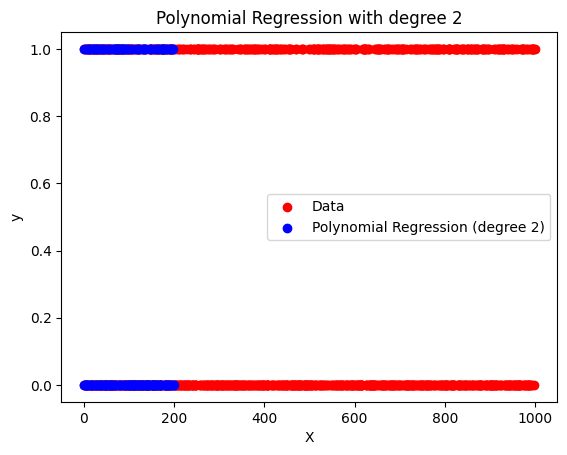

In [ ]:
degree = 2
# Plot the data
plt.scatter(range(len(y)), y, color='red', label='Data')

# Plot the model's predictions
# This assumes `X_test` is defined and corresponds to the range of `y_pred`
plt.scatter(range(len(y_pred)), y_pred, color='blue', label=f'Polynomial Regression (degree {degree})')

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Polynomial Regression with degree {degree}')
plt.legend()

# Show the plot
plt.show()


**Multinomial**

In [ ]:
X = data.drop('Heart Disease',axis=1)
y = data['Heart Disease']

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model using OvR approach
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"OvR Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

OvR Accuracy: 0.87
Confusion Matrix:
 [[106  12]
 [ 14  68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       118
           1       0.85      0.83      0.84        82

    accuracy                           0.87       200
   macro avg       0.87      0.86      0.87       200
weighted avg       0.87      0.87      0.87       200



**By Applying Cross Validation**

In [ ]:
X = data.drop('Heart Disease',axis=1)
y = data['Heart Disease']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=50000, multi_class='multinomial', solver='lbfgs')

# Apply cross-validation on all features
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("\nCross-validation scores on all features:")
print(cv_scores)
print(f"Mean CV Accuracy (All Features): {np.mean(cv_scores):.4f}")

# Train the model on all features and evaluate
model.fit(X_train, y_train)
y_pred_all = model.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f"\nAccuracy on test data (All Features): {accuracy_all:.4f}")


Cross-validation scores on all features:
[0.80625 0.8875  0.86875 0.825   0.875  ]
Mean CV Accuracy (All Features): 0.8525

Accuracy on test data (All Features): 0.8700


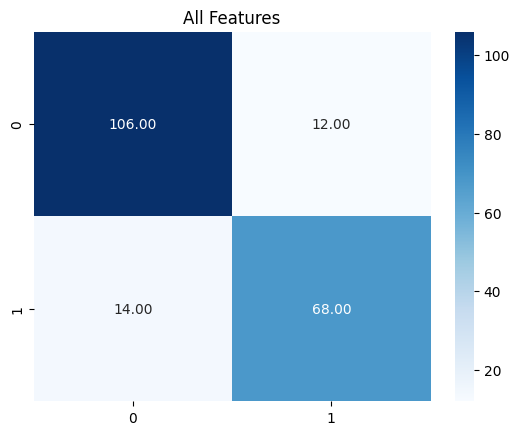

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_all), annot=True, fmt='.2f', cmap='Blues')
plt.title('All Features')

plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = data.drop('Heart Disease',axis=1)
y = data['Heart Disease']

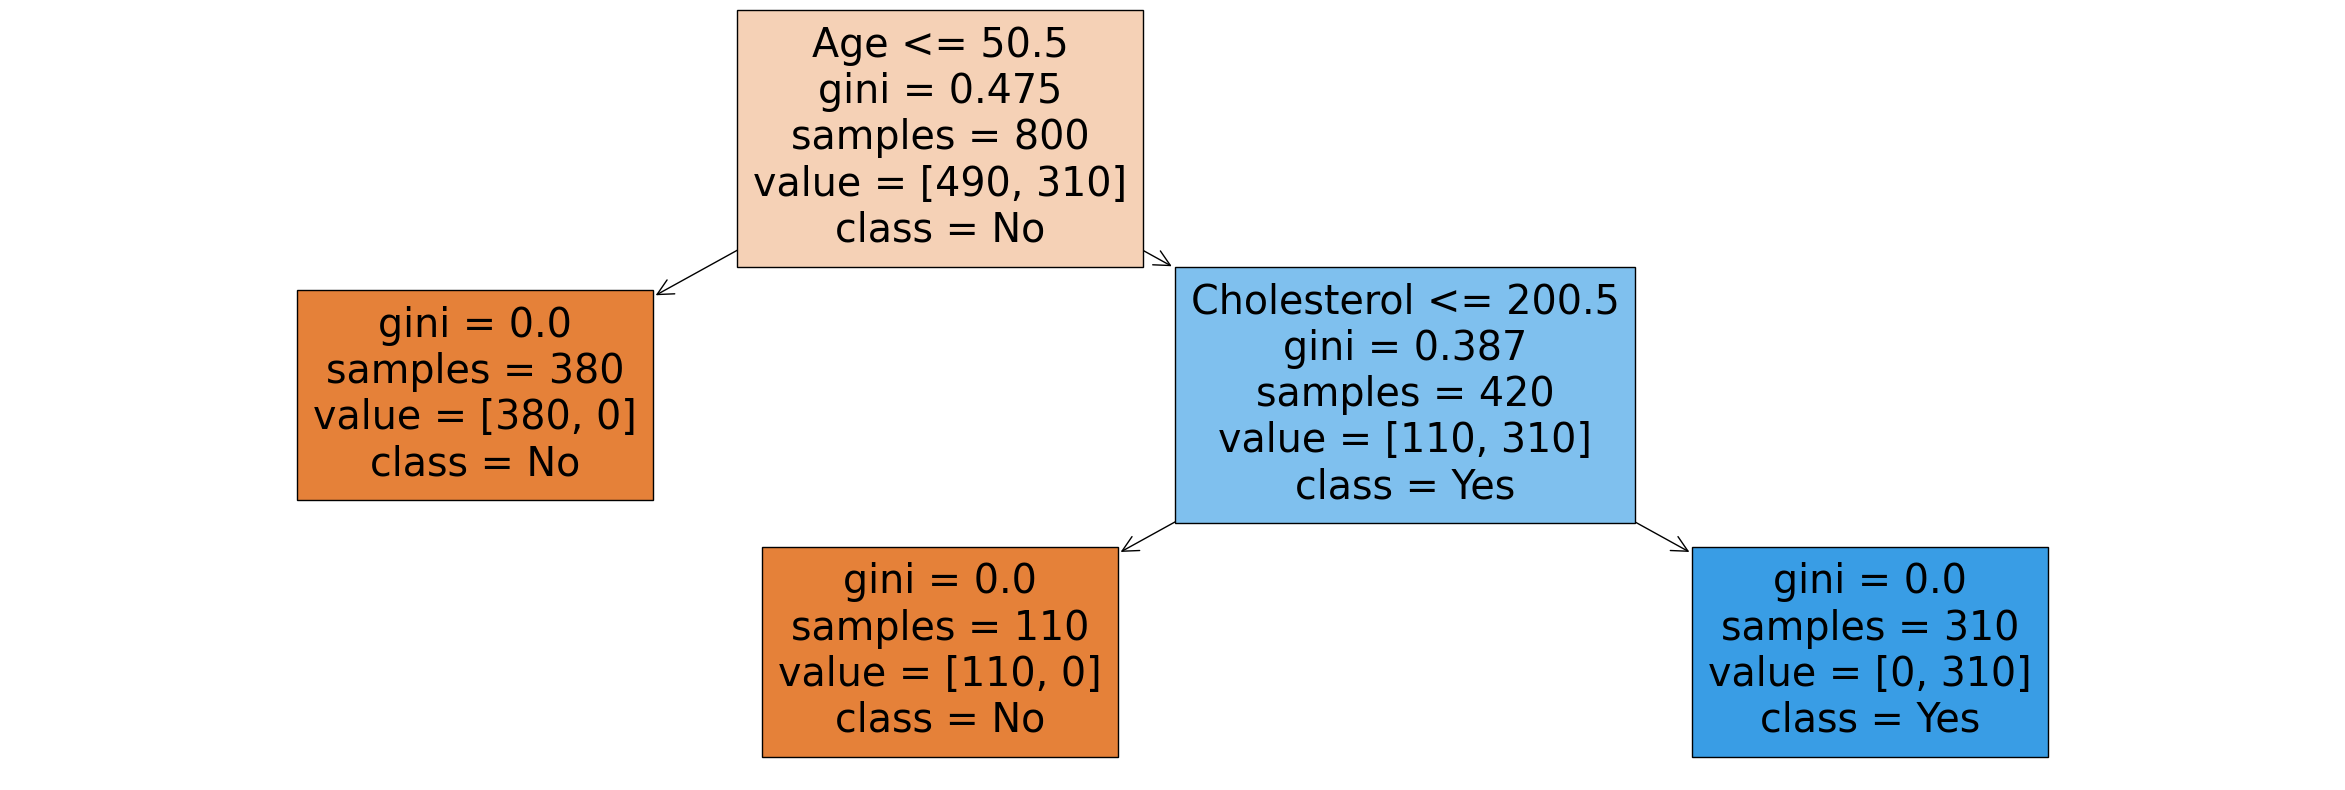

Confusion Matrix:
[[118   0]
 [  0  82]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Accuracy Score:
1.0


In [ ]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)
plt.figure(figsize=(30,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))#, target_names=y

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = data.drop('Heart Disease',axis=1)
y = data['Heart Disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Random Forest Model Accuracy: {accuracy:.2f}')

# Displaying feature importance
importances = rf_model.feature_importances_
feature_names = data.columns
for feature, importance in zip(feature_names, importances):
    print(f'Feature: {feature}, Importance: {importance:.4f}')


Random Forest Model Accuracy: 1.00
Feature: Age, Importance: 0.4969
Feature: Cholesterol, Importance: 0.2515
Feature: Blood Pressure, Importance: 0.0365
Feature: Heart Rate, Importance: 0.0350
Feature: Exercise Hours, Importance: 0.0235
Feature: Stress Level, Importance: 0.0232
Feature: Blood Sugar, Importance: 0.0347
Feature: Heart Disease, Importance: 0.0040
Feature: Gender_Female, Importance: 0.0054
Feature: Gender_Male, Importance: 0.0047
Feature: Smoking_Current, Importance: 0.0074
Feature: Smoking_Former, Importance: 0.0066
Feature: Smoking_Never, Importance: 0.0068
Feature: Alcohol Intake_Heavy, Importance: 0.0051
Feature: Alcohol Intake_Moderate, Importance: 0.0045
Feature: Family History_No, Importance: 0.0056
Feature: Family History_Yes, Importance: 0.0050
Feature: Diabetes_No, Importance: 0.0042
Feature: Diabetes_Yes, Importance: 0.0048
Feature: Obesity_No, Importance: 0.0052
Feature: Obesity_Yes, Importance: 0.0042
Feature: Exercise Induced Angina_No, Importance: 0.0043
Fea

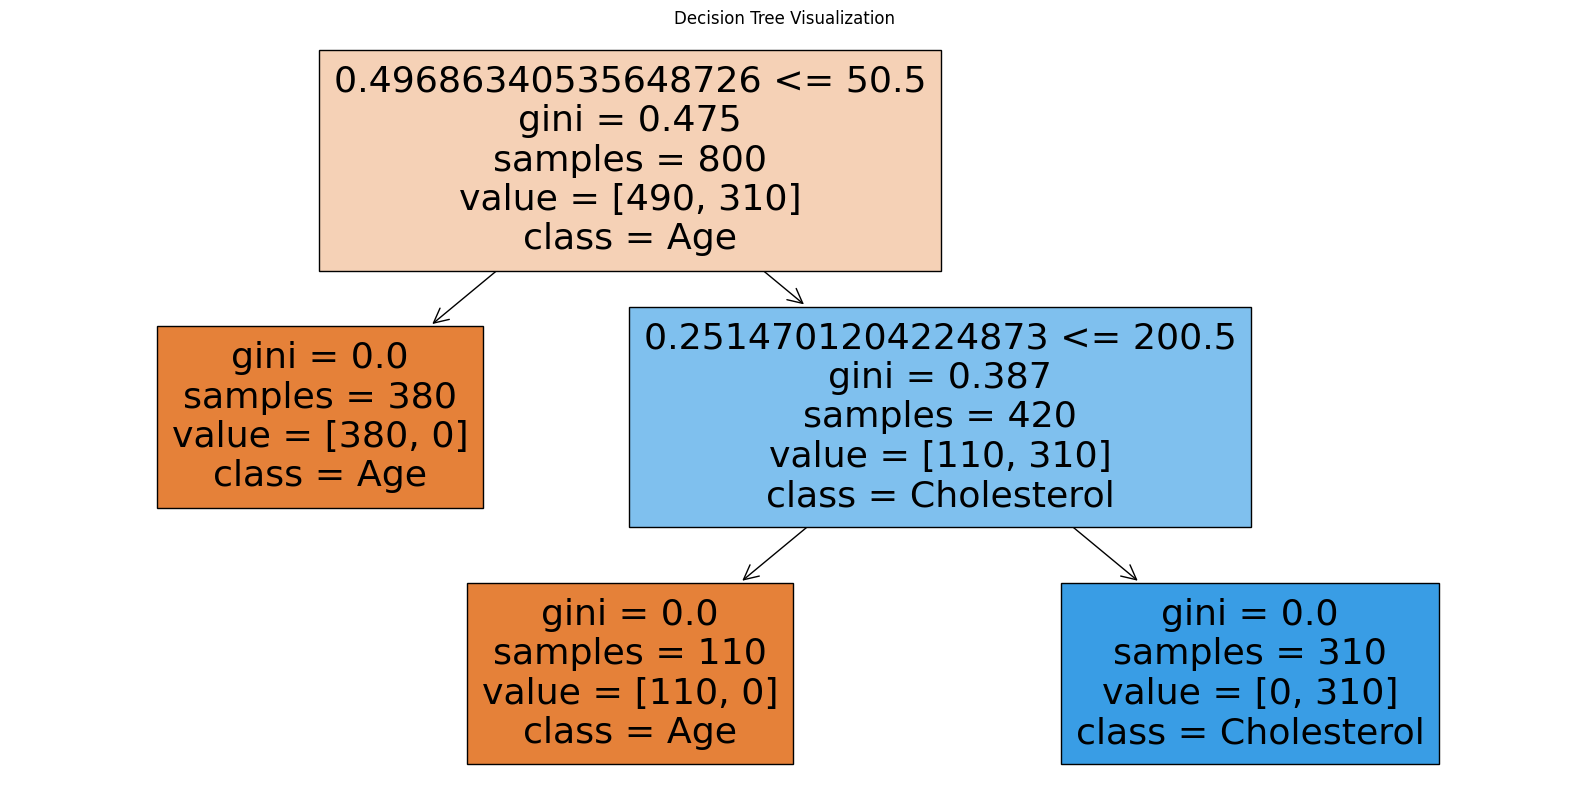

In [ ]:
# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=importances, class_names=feature_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

**Accuracy Matrix**

In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=5000),
    'Multinomial Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000),
    'One-vs-Rest Logistic Regression': OneVsRestClassifier(LogisticRegression(solver='liblinear'))
}
# Dictionary to store accuracy scores
accuracy_scores = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy score
    accuracy_scores[model_name] = accuracy

# Convert accuracy scores to a DataFrame
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])
accuracy_df.sort_values(by='Accuracy', ascending=False, inplace=True)

# Print the accuracy matrix
print("Accuracy Scores of Models:")
print(accuracy_df)


Accuracy Scores of Models:
                             Model  Accuracy
0                    Decision Tree  1.000000
1                    Random Forest  1.000000
2              Logistic Regression  0.840000
3  Multinomial Logistic Regression  0.836667
4  One-vs-Rest Logistic Regression  0.813333


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<ipython-input-73-201f792f26eb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')


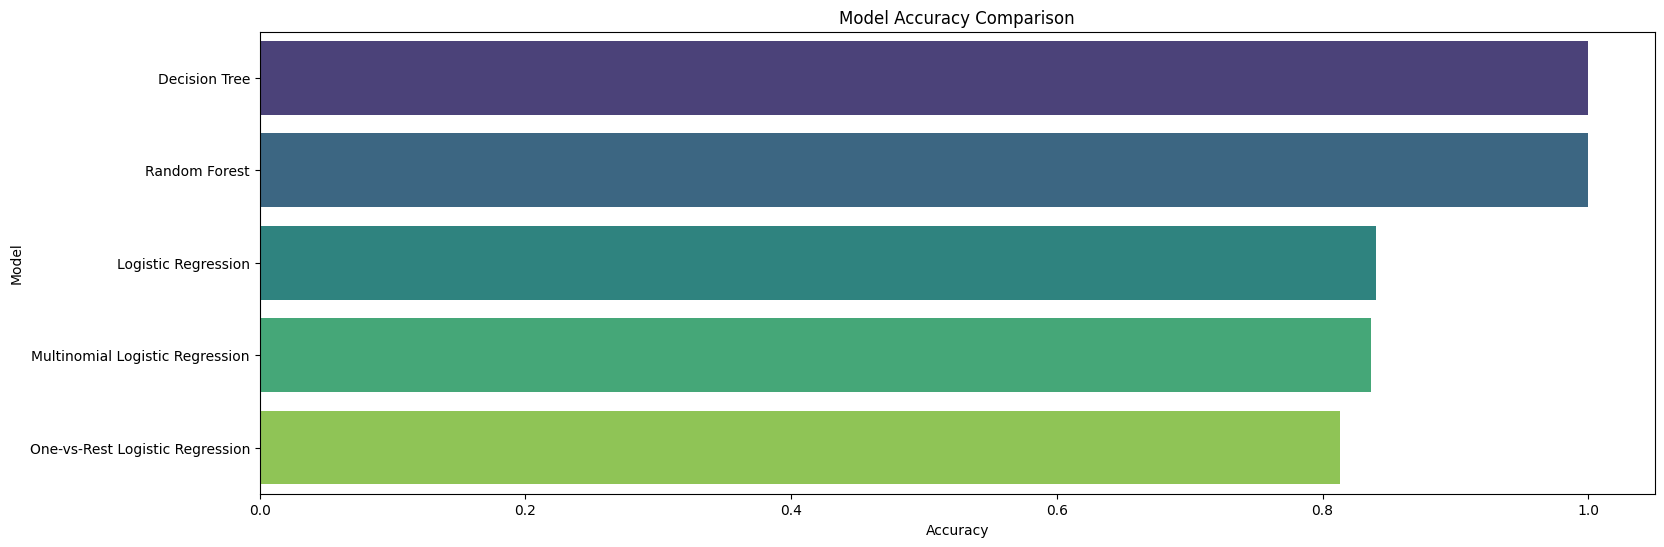

In [ ]:
# Plot accuracy scores

plt.figure(figsize=(18, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

**Summary**


Age: Strongly associated with heart disease; the older the age, the higher the risk. Cholesterol: Important but less impactful compared to age; high cholesterol is a modifiable risk factor.

****Conclusion****

**Findings:**
Accuracy Scores: We computed the accuracy of each model to compare their performance. The results will show how well each model classifies the Heart Disease dataset and help determine which model performs best. Visualization: We used a bar plot to visualize the accuracy scores of the different models, making it easier to compare their performance at a glance.

Both 'Age' and 'Cholesterol' are important predictors of heart disease, age generally has a stronger and more direct impact.
